<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 8. Продвинутые методы классификации и регрессии. Xgboost</center>
## <center>Практика. Настройка Xgboost в задаче регрессии</center>

In [2]:
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split, StratifiedKFold

Populating the interactive namespace from numpy and matplotlib


**Считаем данные.**

In [3]:
data = load_boston()
X, y = pd.DataFrame(data['data'], columns=data['feature_names']), data['target']

**Оставим 30% данных на финальную проверку моделей.**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=7)

**Зафиксируем объект StratifiedKFold, с его помощью будет проводить кросс-валидацию.**

In [8]:
skf = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=7)

**Используйте sklearn-обертку Xgboost для оценки RMSE на кросс-валидации с данными (X_train, y_train). Пока оставьте параметры XGBRegressor по умолчанию (только seed=7, это то же по сути, что random_state). Выведите среднюю RMSE на кросс-вадидации, используйте ранее созданный объект StratifiedKFold. Для этого надо использовать аргумент scoring='neg_mean_squared_error' у cross_val_score. К тому же, по ошибке он может выводить не тот знак (надо взять модуль), и, наконец, корень. Можно реализовать функцию cross_val_rmse, которая все это делает.**

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score

In [11]:
xgb_model1 = XGBRegressor(seed=7)

In [21]:
''' ВАШ КОД ЗДЕСЬ'''
np.sqrt(np.mean([abs(sc) for sc in cross_val_score(xgb_model1, X_train, y_train, cv=skf, scoring='mean_squared_error')]))

3.7182205637223946

**Обучите модель на (X_train, y_train) и выведите оценку важности признаков (plot_importance из xgboost).**

In [23]:
from xgboost import plot_importance

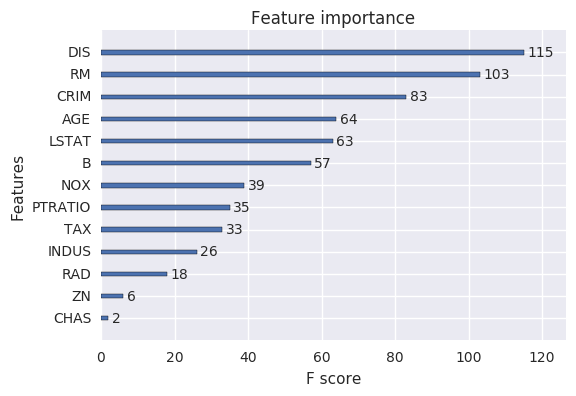

In [24]:
''' ВАШ КОД ЗДЕСЬ'''
xgb_model1.fit(X_train, y_train)
plot_importance(xgb_model1)

**Постройте кривые валидации по глубине деревьев от 2 до 7. Все прочие параметры кросс-валидации возьмите как на предыдущем шаге. Достаточно сохранять только среднюю RMSE на валидационной части (на обучающей – не надо).**

In [25]:
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
tree_depths = np.arange(2,8)
xgb_scores = []
for depth in tree_depths:
    ''' ВАШ КОД ЗДЕСЬ'''
    xgb_model = XGBRegressor(seed=7, max_depth=depth)
    for train, test in kf.split(X_train):
        xgb_model.fit(train)
        xgb_model.predict(test)
        mean_squared_error()

In [ ]:
plot(tree_depths, xgb_scores, color='green', label='Xgb');
xlabel('Max depth')
ylabel('5-CV RMSE')
legend();

**Используйте RandomizedGridSearch, чтобы настроить параметры бустинга. Задайте 10 итераций (будут перебираться случайные 10 комбинаций параметров), а кросс-валидацию – как ранее. Выведите лучшие параметры и RMSE (поля best\_params\_ и best\_score\_ у обученного RandomizedGridSearch). В RandomizedGridSearch в качестве estimator можно предавать XGBRegressor с фиксированными параметрами, а в качестве параметров для перебора param_distributions – те, что мы проверяем.**

В Python можно передать словарь аргументов и их значений вот так: SomeClass(\*\*params)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb_params_dist_grid = {
    'max_depth': [2, 4, 5, 6],
    'gamma': np.linspace(0, 0.5, 5),
    'subsample': [0.5, 0.75, 1.],
    'colsample_bytree': [0.5, 0.75, 1.]
}
xgb_params_fixed = {
    'objective': 'reg:linear',
    'silent': 1,
    'seed': 7
}

In [ ]:
xgb_grid = RandomizedSearchCV(
    ''' ВАШ КОД ЗДЕСЬ'''
)

In [ ]:
%%time
xgb_grid.fit(X_train, y_train);

In [ ]:
xgb_grid.best_params_

In [ ]:
np.sqrt(np.abs(xgb_grid.best_score_))

**Проверьте RMSE бустинга на оставленной выборке. Сравните две версии бустинга – ненастроенную и настроенную.**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
''' ВАШ КОД ЗДЕСЬ'''